In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [4]:
df = pd.read_csv("household_2021a.csv", index_col=0)

In [5]:
df.head()

,year,metro,id,sex,old_h,grand_h,single_h,multi_h,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year
0,2021,G1,10000162,2,G1,G2,G2,G2,74,1,2,3,15740,0,1718,1617,T,4,2,0
1,2021,G1,10000182,1,G2,G2,G2,G2,59,2,4,2,13680,0,2977,2744,C,5,2,9
2,2021,G1,10000192,2,G2,G2,G2,G2,28,1,4,1,1520,400,971,878,R,2,3,9
3,2021,G2,10000212,1,G1,G2,G2,G2,72,2,4,2,16982,300,3101,2992,NaN,NaN,1,9
4,2021,G2,10000222,1,G2,G2,G2,G2,53,1,4,1,6410,6500,3066,2137,C,9,1,9


In [6]:
len(df)

18187

marrige code :
1	미혼,
2	배우자있음,
3	사별,
4	이혼

house code : 
1	자가,
2	전세,
3	보증금 있는 월세,
4	보증금 없는 월세,
5	기타

In [7]:
# 1. marriaged, 2. single
def status(x):
    if x== 2:
        return 1    
    else:
        return 0

In [8]:
df1 = df.copy()

In [9]:
#df1 = df1.loc[df1['marriage'].isin([1,2,4])]
df1 = df1.loc[~df1['marriage'].isin([3])]

In [10]:
len(df1)

15320

In [11]:
df1['marriage_type'] = df1['marriage'].apply(status)

In [13]:
df1['const'] = 1

In [14]:
df1['age2'] = df1['age']**2
df1['sex'] = (df1['sex']).astype(int)

In [15]:
x =df1[['const', 'income', 'age', 'age2', 'education_year']].to_numpy()

In [16]:
y =df1['marriage_type'].to_numpy()

In [17]:
logit = sm.Logit(y, x)
results = logit.fit(method='newton')
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.405483
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                15320
Model:                          Logit   Df Residuals:                    15315
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.2920
Time:                        14:51:50   Log-Likelihood:                -6212.0
converged:                       True   LL-Null:                       -8773.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4320      0.310     -7.837      0.000      -3.040      -1.824
x1             0.0005   1.13e

In [18]:
# 1. Confusion Matrix

In [19]:
coef = results.params

In [20]:
def log_odds(x):
    return coef[0]*x[0] + coef[1]*x[1]+coef[2]*x[2]+coef[3]*x[3]+coef[4]*x[4]

In [21]:
def prob(x):
    return 1 / (1 + np.exp(-(log_odds(x))))

In [22]:
p_m = []

for i in range(len(x)):
    x1 = x[i,:]
    x2 = prob(x1)
    p_m.append(x2)

In [23]:
y_Predicted = (np.array(p_m) > 0.5).astype(int)

In [24]:
y_Actual = y.copy()

In [25]:
data = {'y_Actual':    y_Actual,
        'y_Predicted': y_Predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [26]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

In [27]:
confusion_matrix

Predicted,0,1
Actual,,
0,2121,1857
1,899,10443


In [28]:
TP = confusion_matrix.loc[1,1]
FP = confusion_matrix.loc[0,1]
FN = confusion_matrix.loc[1,0]
TN = confusion_matrix.loc[0,0]

In [29]:
ACC = (TP + TN)/(TP+TN+FN+FP)

In [30]:
TPR  = (TP)/(TP+FN)
FPR  = FP/(FP+TN)


In [31]:
print('accuracy ratio:', ACC)
print('TPR: ',TPR)
print('FPR:', FPR)

accuracy ratio: 0.8201044386422977
TPR:  0.9207370834068066
FPR: 0.46681749622926094


In [32]:
n = 100
roc = np.zeros([n,3])

In [34]:
for pr in range(0,100, 1):
    
    confusion_matrix = np.zeros([2,2])
    
    y_Predicted = (np.array(p_m) > pr/n).astype(int)
    y_Actual = y.copy()
    data = {'y_Actual': y_Actual, 'y_Predicted': y_Predicted}
    df = pd.DataFrame(data, columns = ['y_Actual', 'y_Predicted'])
    cross = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames = ['Actual'], colnames=['Predicted'])
    
    try : 
        confusion_matrix[1,1] = cross.loc[1,1]
        confusion_matrix[0,1] = cross.loc[0,1]
        confusion_matrix[1,0] = cross.loc[1,0]
        confusion_matrix[0,0] = cross.loc[0,0]
        
    except Exception as e:
        print(e)
        
    TP  = confusion_matrix[1,1]
    FP  = confusion_matrix[0,1]
    FN  = confusion_matrix[1,0]
    TN  = confusion_matrix[0,0]
    
    roc[pr, 0] = pr/n
    roc[pr, 1] = FP/(FP+TN)
    roc[pr, 2] = TP/(TP+FN)

0
0
0
0
0
0


In [35]:
roc1 = pd.DataFrame(data=roc, columns = ['prob', 'FPR', 'TPR'])

In [36]:
roc2 = roc1.groupby('FPR').mean()

In [37]:
roc3 = roc2.drop(['prob'], axis = 1)

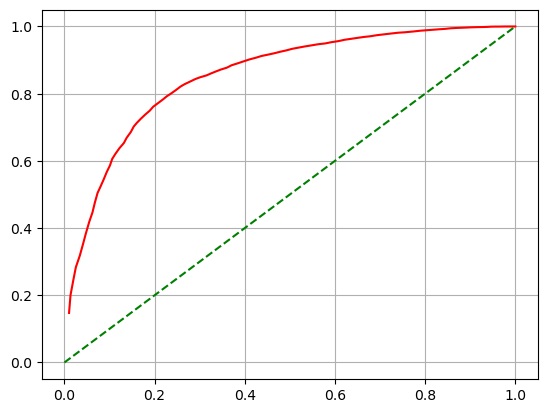

In [38]:
plt.plot(roc3.index, roc3['TPR'], color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='random')
plt.grid()
plt.savefig("ROC02.png", dpi=150, bbox_inches='tight')
plt.show()

### AUC

In [39]:
roc3['FPR'] = roc3.index

In [41]:
roc3['dFPR'] = roc3.FPR - roc3.FPR.shift(1)

In [44]:
roc3['aTPR'] = (roc3.TPR + roc3.TPR.shift(1))/2

In [45]:
roc3['AREA'] = roc3.dFPR * roc3.aTPR

In [46]:
roc4 = roc3.dropna()

In [47]:
roc5 = roc4.sum()

In [48]:
AUC = roc5.loc['AREA']

In [49]:
np.round(AUC, 2)

0.85